In [1]:
# Dependencies

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import os

In [2]:
pokedex = pd.read_csv('Pokemon.csv')
pokedex.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [3]:
# This is Daniels section of code
# Classification of Legendary Status
y = pokedex["Legendary"]
y.value_counts()


False    735
True      65
Name: Legendary, dtype: int64

In [4]:
X = pokedex.drop("Legendary", axis=1)
X = X.drop("#", axis=1)
X = X.drop("Name", axis=1)
X = X.drop("Type 1", axis=1)
X = X.drop("Type 2", axis=1)
X.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [7]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.920
k: 3, Train/Test Score: 0.972/0.925
k: 5, Train/Test Score: 0.958/0.935
k: 7, Train/Test Score: 0.958/0.930
k: 9, Train/Test Score: 0.952/0.935
k: 11, Train/Test Score: 0.945/0.940
k: 13, Train/Test Score: 0.948/0.945
k: 15, Train/Test Score: 0.943/0.945
k: 17, Train/Test Score: 0.948/0.945
k: 19, Train/Test Score: 0.950/0.940


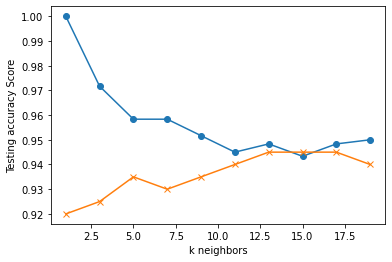

In [8]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [9]:
# Note that k: 15 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=15 Test Acc: 0.945


In [10]:
predicted_class = knn.predict(X_scaler.transform(X))
# print(predicted_class)

In [11]:
# Classification of Primary Type
y2 = pokedex["Type 1"]
y2.value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, random_state=47)

X_scaler2 = StandardScaler().fit(X_train)

X_train_scaled = X_scaler2.transform(X_train)
X_test_scaled = X_scaler2.transform(X_test)

k: 1, Train/Test Score: 0.997/0.205
k: 3, Train/Test Score: 0.477/0.135
k: 5, Train/Test Score: 0.422/0.170
k: 7, Train/Test Score: 0.380/0.185
k: 9, Train/Test Score: 0.372/0.185
k: 11, Train/Test Score: 0.358/0.195
k: 13, Train/Test Score: 0.345/0.215
k: 15, Train/Test Score: 0.328/0.235
k: 17, Train/Test Score: 0.315/0.220
k: 19, Train/Test Score: 0.302/0.205


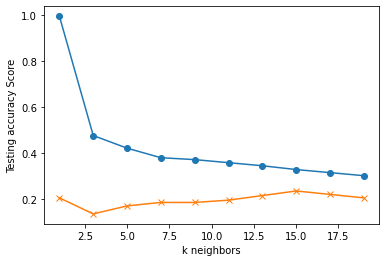

In [13]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [14]:
# Note that k: 17 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=17 Test Acc: 0.220


In [15]:
predicted_class = knn.predict(X_scaler2.transform(X))
# print(predicted_class)

predictions = pokedex[['Name',"Type 1"]]
predictions['Predicted Type'] = predicted_class
predictions.head()

<ipython-input-15-53e135d534af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['Predicted Type'] = predicted_class


,Name,Type 1,Predicted Type
0,Bulbasaur,Grass,Fire
1,Ivysaur,Grass,Grass
2,Venusaur,Grass,Water
3,VenusaurMega Venusaur,Grass,Dragon
4,Charmander,Fire,Fire


In [16]:
accuracy = []
for index, row in predictions.iterrows():
    if predictions.loc[index,'Type 1'] == predictions.loc[index,'Predicted Type']:
        accuracy.append(1)
    else:
        accuracy.append(0)
predictions['Accurate'] = accuracy
predictions.head()

<ipython-input-16-4e4376b56e8c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['Accurate'] = accuracy


,Name,Type 1,Predicted Type,Accurate
0,Bulbasaur,Grass,Fire,0
1,Ivysaur,Grass,Grass,1
2,Venusaur,Grass,Water,0
3,VenusaurMega Venusaur,Grass,Dragon,0
4,Charmander,Fire,Fire,1


In [17]:
grouping = predictions.groupby('Type 1')
grouping.mean()

,Accurate
Type 1,
Bug,0.463768
Dark,0.129032
Dragon,0.375000
Electric,0.272727
Fairy,0.176471
Fighting,0.037037
Fire,0.346154
Flying,0.000000
Ghost,0.218750


In [18]:
# This is Tanners section of code

from numpy.random import seed
seed(1)
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets


y = pokedex['Legendary']

X = pokedex.drop("Legendary", axis=1)
X = X.drop("#", axis=1)
X = X.drop("Name", axis=1)
X = X.drop("Type 1", axis=1)
X = X.drop("Type 2", axis=1)
X.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [19]:
 # Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [20]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [21]:
 # Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [24]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=8))
model.add(Dense(units=2, activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 54        
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 14        
Total params: 68
Trainable params: 68
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
 # Fit the model to the training data
history = model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle = True,
    verbose = 2,
    validation_data=(X_test_scaled,y_test_categorical)
)

Epoch 1/100
19/19 - 1s - loss: 0.4844 - accuracy: 0.8800 - val_loss: 0.4724 - val_accuracy: 0.8950
Epoch 2/100
19/19 - 0s - loss: 0.4422 - accuracy: 0.8967 - val_loss: 0.4342 - val_accuracy: 0.9050
Epoch 3/100
19/19 - 0s - loss: 0.4078 - accuracy: 0.9067 - val_loss: 0.4018 - val_accuracy: 0.9150
Epoch 4/100
19/19 - 0s - loss: 0.3788 - accuracy: 0.9100 - val_loss: 0.3736 - val_accuracy: 0.9150
Epoch 5/100
19/19 - 0s - loss: 0.3535 - accuracy: 0.9133 - val_loss: 0.3491 - val_accuracy: 0.9200
Epoch 6/100
19/19 - 0s - loss: 0.3312 - accuracy: 0.9217 - val_loss: 0.3279 - val_accuracy: 0.9200
Epoch 7/100
19/19 - 0s - loss: 0.3117 - accuracy: 0.9217 - val_loss: 0.3100 - val_accuracy: 0.9200
Epoch 8/100
19/19 - 0s - loss: 0.2945 - accuracy: 0.9217 - val_loss: 0.2940 - val_accuracy: 0.9200
Epoch 9/100
19/19 - 0s - loss: 0.2792 - accuracy: 0.9217 - val_loss: 0.2797 - val_accuracy: 0.9200
Epoch 10/100
19/19 - 0s - loss: 0.2654 - accuracy: 0.9200 - val_loss: 0.2677 - val_accuracy: 0.9300
Epoch 11/

19/19 - 0s - loss: 0.0855 - accuracy: 0.9600 - val_loss: 0.1112 - val_accuracy: 0.9600
Epoch 84/100
19/19 - 0s - loss: 0.0854 - accuracy: 0.9617 - val_loss: 0.1109 - val_accuracy: 0.9600
Epoch 85/100
19/19 - 0s - loss: 0.0849 - accuracy: 0.9633 - val_loss: 0.1106 - val_accuracy: 0.9600
Epoch 86/100
19/19 - 0s - loss: 0.0847 - accuracy: 0.9633 - val_loss: 0.1098 - val_accuracy: 0.9600
Epoch 87/100
19/19 - 0s - loss: 0.0845 - accuracy: 0.9600 - val_loss: 0.1101 - val_accuracy: 0.9650
Epoch 88/100
19/19 - 0s - loss: 0.0843 - accuracy: 0.9617 - val_loss: 0.1094 - val_accuracy: 0.9600
Epoch 89/100
19/19 - 0s - loss: 0.0841 - accuracy: 0.9617 - val_loss: 0.1090 - val_accuracy: 0.9650
Epoch 90/100
19/19 - 0s - loss: 0.0838 - accuracy: 0.9600 - val_loss: 0.1094 - val_accuracy: 0.9650
Epoch 91/100
19/19 - 0s - loss: 0.0835 - accuracy: 0.9633 - val_loss: 0.1087 - val_accuracy: 0.9600
Epoch 92/100
19/19 - 0s - loss: 0.0834 - accuracy: 0.9617 - val_loss: 0.1085 - val_accuracy: 0.9650
Epoch 93/100


In [28]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

7/7 - 0s - loss: 0.1057 - accuracy: 0.9650
Normal Neural Network - Loss: 0.105727918446064, Accuracy: 0.9649999737739563


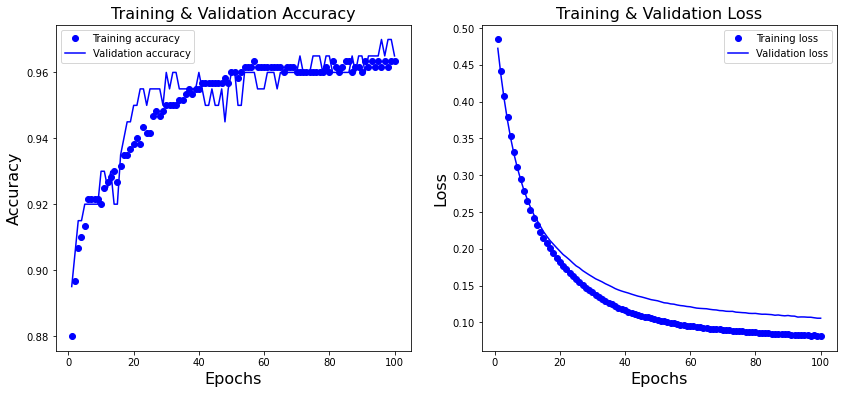

In [29]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
#
# Plot the model accuracy vs Epochs
#
ax[0].plot(epochs, accuracy, 'bo', label='Training accuracy')
ax[0].plot(epochs, val_accuracy, 'b', label='Validation accuracy')
ax[0].set_title('Training & Validation Accuracy', fontsize=16)
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Accuracy', fontsize=16)
ax[0].legend()
#
# Plot the loss vs Epochs
#
ax[1].plot(epochs, loss_values, 'bo', label='Training loss')
ax[1].plot(epochs, val_loss_values, 'b', label='Validation loss')
ax[1].set_title('Training & Validation Loss', fontsize=16)
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Loss', fontsize=16)
ax[1].legend()

In [30]:
# Classification of Primary Type
y2 = pokedex["Type 1"]
y2.value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, stratify=y2,random_state=1)

X_scaler2 = StandardScaler().fit(X_train)

X_train_scaled = X_scaler2.transform(X_train)
X_test_scaled = X_scaler2.transform(X_test)

In [32]:
# One-hot encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)



In [33]:
model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=8))
model.add(Dense(units=18, activation='softmax'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 18)                126       
Total params: 180
Trainable params: 180
Non-trainable params: 0
_________________________________________________________________


In [35]:
# Compile the model

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


'''
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
'''

"\nmodel.compile(optimizer='adam',\n              loss='binary_crossentropy',\n              metrics=['accuracy'])\n"

In [36]:
 # Fit the model to the training data
history = model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle = True,
    verbose = 2,
    validation_data=(X_test_scaled,y_test_categorical)
)

Epoch 1/100
19/19 - 0s - loss: 3.0040 - accuracy: 0.0467 - val_loss: 2.9560 - val_accuracy: 0.0400
Epoch 2/100
19/19 - 0s - loss: 2.9620 - accuracy: 0.0717 - val_loss: 2.9206 - val_accuracy: 0.0700
Epoch 3/100
19/19 - 0s - loss: 2.9248 - accuracy: 0.0833 - val_loss: 2.8888 - val_accuracy: 0.0800
Epoch 4/100
19/19 - 0s - loss: 2.8924 - accuracy: 0.1033 - val_loss: 2.8609 - val_accuracy: 0.0850
Epoch 5/100
19/19 - 0s - loss: 2.8632 - accuracy: 0.1150 - val_loss: 2.8367 - val_accuracy: 0.1000
Epoch 6/100
19/19 - 0s - loss: 2.8380 - accuracy: 0.1333 - val_loss: 2.8152 - val_accuracy: 0.1200
Epoch 7/100
19/19 - 0s - loss: 2.8146 - accuracy: 0.1450 - val_loss: 2.7949 - val_accuracy: 0.1250
Epoch 8/100
19/19 - 0s - loss: 2.7940 - accuracy: 0.1467 - val_loss: 2.7767 - val_accuracy: 0.1300
Epoch 9/100
19/19 - 0s - loss: 2.7755 - accuracy: 0.1500 - val_loss: 2.7602 - val_accuracy: 0.1350
Epoch 10/100
19/19 - 0s - loss: 2.7585 - accuracy: 0.1517 - val_loss: 2.7451 - val_accuracy: 0.1300
Epoch 11/

19/19 - 0s - loss: 2.3588 - accuracy: 0.2533 - val_loss: 2.4630 - val_accuracy: 0.1750
Epoch 84/100
19/19 - 0s - loss: 2.3569 - accuracy: 0.2567 - val_loss: 2.4620 - val_accuracy: 0.1600
Epoch 85/100
19/19 - 0s - loss: 2.3541 - accuracy: 0.2600 - val_loss: 2.4617 - val_accuracy: 0.1700
Epoch 86/100
19/19 - 0s - loss: 2.3522 - accuracy: 0.2583 - val_loss: 2.4605 - val_accuracy: 0.1600
Epoch 87/100
19/19 - 0s - loss: 2.3499 - accuracy: 0.2583 - val_loss: 2.4606 - val_accuracy: 0.1700
Epoch 88/100
19/19 - 0s - loss: 2.3483 - accuracy: 0.2567 - val_loss: 2.4589 - val_accuracy: 0.1700
Epoch 89/100
19/19 - 0s - loss: 2.3462 - accuracy: 0.2567 - val_loss: 2.4586 - val_accuracy: 0.1650
Epoch 90/100
19/19 - 0s - loss: 2.3443 - accuracy: 0.2583 - val_loss: 2.4584 - val_accuracy: 0.1600
Epoch 91/100
19/19 - 0s - loss: 2.3423 - accuracy: 0.2600 - val_loss: 2.4577 - val_accuracy: 0.1500
Epoch 92/100
19/19 - 0s - loss: 2.3408 - accuracy: 0.2550 - val_loss: 2.4553 - val_accuracy: 0.1600
Epoch 93/100


In [37]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

7/7 - 0s - loss: 2.4472 - accuracy: 0.1800
Normal Neural Network - Loss: 2.4472239017486572, Accuracy: 0.18000000715255737


In [38]:
# This is Michaels section of code

In [39]:
# This is Masons section of code

# Set our prediction targets and name them

y = pokedex["Legendary"]
target_names = ["negative", "positive"]


#Classification of Legendary Status

X = pokedex.drop("Legendary", axis=1)

X = X.drop("#", axis=1)

X = X.drop("Name", axis=1)

X = X.drop("Type 1", axis=1)

X = X.drop("Type 2", axis=1)

feature_names = X.columns

X.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [40]:
# Import learning and training for the random forest

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [41]:

# Import the random forest classifier and input values and variables

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier (n_estimators=300)

rf = rf.fit(X_train, y_train)

rf.score(X_test, y_test)

0.955

In [42]:
# Sort by importance for predicting Legendary Status

sorted(zip(rf.feature_importances_, feature_names), reverse = True)

[(0.29385901930027636, 'Total'),
 (0.15718446491215413, 'Sp. Atk'),
 (0.1148550450690112, 'Speed'),
 (0.11287985966884564, 'HP'),
 (0.09732801496475155, 'Attack'),
 (0.09431328688696373, 'Sp. Def'),
 (0.06835382228846897, 'Defense'),
 (0.06122648690952849, 'Generation')]

In [43]:

# Classification of Primary Type

y2 = pokedex["Type 1"]

y2.value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, random_state=47)


In [45]:
rf = RandomForestClassifier (n_estimators=300)

rf = rf.fit(X_train, y_train)

rf.score(X_test, y_test)

0.255

In [52]:
# Comparison of Predictions By Type 1
predictions = pokedex[['Name',"Type 1"]]

# KNN Predictions
predicted_class_knn = knn.predict(X_scaler2.transform(X))

# Neural Network Predicstions
# predicted_class_nn = model.predict(X_scaler2.transform([[1,2,3,4,5,6,7,8]]))
print(model.predict(X_scaler2.transform([[1,2,3,4,5,6,7,8]])))

# Creating a dataframe to compare data
predictions['KNN Prediction'] = predicted_class_knn
# predictions['Neural Network Prediction'] = predicted_class_nn
predictions.head()

[[0.11457865 0.00999602 0.00460449 0.17878255 0.14688118 0.01281768
  0.07219118 0.00246747 0.05466825 0.14346954 0.00368809 0.0650923
  0.03920261 0.00522657 0.08650853 0.00132594 0.0005725  0.05792651]]


<ipython-input-52-377a60c8c00e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['KNN Prediction'] = predicted_class_knn


,Name,Type 1,KNN Prediction
0,Bulbasaur,Grass,Fire
1,Ivysaur,Grass,Grass
2,Venusaur,Grass,Water
3,VenusaurMega Venusaur,Grass,Dragon
4,Charmander,Fire,Fire
